<a href="https://colab.research.google.com/github/chetansolanke14/MachineLearningUdemy/blob/master/Pytorch/LinearRegression_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch as tch
from torch.nn import Linear
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [0]:
w = tch.tensor(3.0, requires_grad=True)
b = tch.tensor(1.0, requires_grad=True)

In [0]:
def forward(x):
  y =w*x + b
  return y

In [0]:
x = tch.tensor([[4],[7]])
y=forward(x)

In [0]:
tch.manual_seed(1)

model =Linear(in_features=1, out_features=1)

In [6]:
print(model.bias, model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [7]:
x =tch.tensor([2.0])
print(model(x))

tensor([0.5891], grad_fn=<AddBackward0>)


In [8]:
x =tch.tensor([[2.0],[1.3]])
print(model(x))

tensor([[0.5891],
        [0.2285]], grad_fn=<AddmmBackward>)


## Custom Model

In [0]:
class LR(nn.Module):
  def __init__(self, input_size,output_size):
    super().__init__()
    self.linear =nn.Linear(input_size,output_size)
    
  def forward(self,x):
    pred=self.linear(x)
    return pred

In [10]:
tch.manual_seed(1)
model =LR(1,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [11]:
x =tch.tensor([1.0])
print(model.forward(x))

tensor([0.0739], grad_fn=<AddBackward0>)


In [12]:
x =tch.tensor([[1.0],[2.0]])
print(model.forward(x))

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)


### Creating Dataset

Text(0.5, 0, 'x')

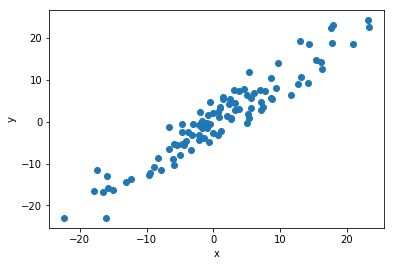

In [2]:
x= tch.randn(100,1)*10
y = x + 3*tch.randn(100,1)
plt.plot(x.numpy(),y.numpy(),'o')
plt.ylabel('y')
plt.xlabel('x')

In [0]:
class LR(nn.Module):
  def __init__(self, input_size,output_size):
    super().__init__()
    self.linear =nn.Linear(input_size,output_size)
    
  def forward(self,x):
    pred=self.linear(x)
    return pred

In [4]:
tch.manual_seed(1)
model =LR(1,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [5]:
[w,b] = model.parameters()
print(w,b)

Parameter containing:
tensor([[0.5153]], requires_grad=True) Parameter containing:
tensor([-0.4414], requires_grad=True)


In [6]:
print(w)
print('*****************')
print(w[0])
print('*****************')
print(w[0][0])

Parameter containing:
tensor([[0.5153]], requires_grad=True)
*****************
tensor([0.5153], grad_fn=<SelectBackward>)
*****************
tensor(0.5153, grad_fn=<SelectBackward>)


In [7]:
w1 = w[0][0]
b1 = b[0].item()
print(w1,b1)

def get_params():
  return (w[0][0].item(),b[0].item())

tensor(0.5153, grad_fn=<SelectBackward>) -0.44137823581695557


In [0]:
def plot_fit(title):
  plt.title =title
  w1,b1 =get_params()
  x1 =np.array([-30,30])
  y1 =w1*x1 +b1
  plt.plot(x1,y1,'r')
  plt.scatter(x,y)
  plt.show()

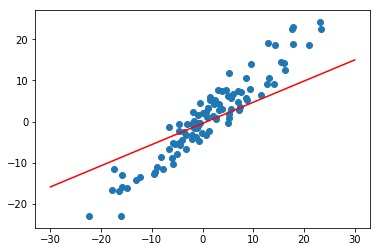

In [9]:
plot_fit('Initial Model')

### Gradient Descent


Mean Square Error:  1/n (sum(y -(mx+b))).squarer()


In [0]:
#Implement GD

criterian =nn.MSELoss()
optimizer = tch.optim.SGD(model.parameters(), lr=0.01)



In [11]:
epochs =100
losses=[]
for i in range(epochs):
  y_pred = model.forward(x)
  loss =criterian(y_pred,y)
  print('epoch : ', i, 'Loss: ' ,loss.item())
  
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch :  0 Loss:  30.315725326538086
epoch :  1 Loss:  21.19086265563965
epoch :  2 Loss:  15.934663772583008
epoch :  3 Loss:  12.906320571899414
epoch :  4 Loss:  11.160967826843262
epoch :  5 Loss:  10.154484748840332
epoch :  6 Loss:  9.573540687561035
epoch :  7 Loss:  9.237695693969727
epoch :  8 Loss:  9.043045043945312
epoch :  9 Loss:  8.9297513961792
epoch :  10 Loss:  8.863354682922363
epoch :  11 Loss:  8.824007034301758
epoch :  12 Loss:  8.800280570983887
epoch :  13 Loss:  8.785592079162598
epoch :  14 Loss:  8.77614688873291
epoch :  15 Loss:  8.769760131835938
epoch :  16 Loss:  8.76517105102539
epoch :  17 Loss:  8.761652946472168
epoch :  18 Loss:  8.758787155151367
epoch :  19 Loss:  8.756328582763672
epoch :  20 Loss:  8.754136085510254
epoch :  21 Loss:  8.752126693725586
epoch :  22 Loss:  8.750252723693848
epoch :  23 Loss:  8.748485565185547
epoch :  24 Loss:  8.746805191040039
epoch :  25 Loss:  8.745201110839844
epoch :  26 Loss:  8.74366569519043
epoch :  27

In [23]:
loss

tensor(4.8947e+11, grad_fn=<MseLossBackward>)

Text(0, 0.5, 'loss')

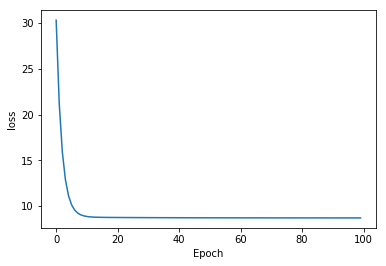

In [12]:
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('loss')

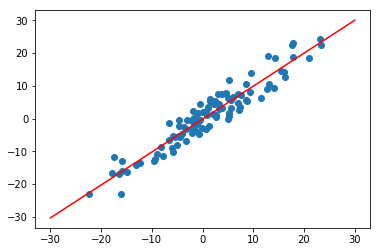

In [13]:
plot_fit('Training Data')